In [ ]:
img_file = './assets/input_images/barbara.jpeg'
# PST Parameters
phase_strength = 0.3, warp_strength = 15
sigma_LPF = 0.1, thresh_min = 0.0, thresh_max = 0.8, morph_flag = 1
# PAGE Parameters
direction_bins = 30, mu_1 = 0, mu_2 = 0.2, sigma_1 = 0.05, sigma_2 = 0.6, S1 = 0.5, S2 = 0.5
sigma_LPF = 0.1, thresh_min=0.0, thresh_max=0.92, morph_flag = 1

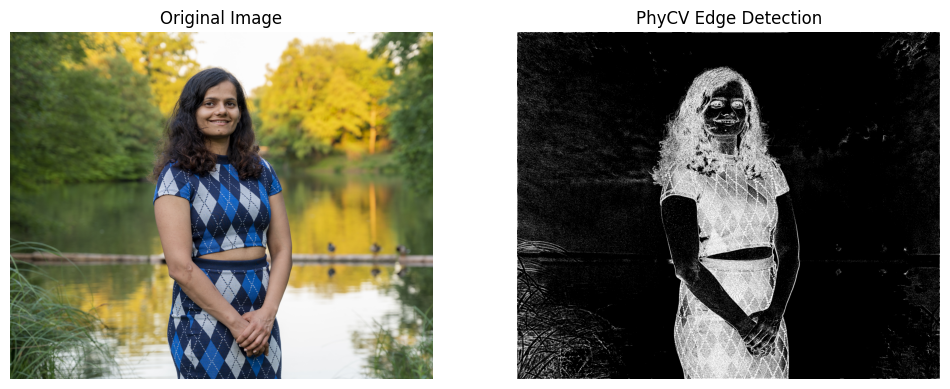

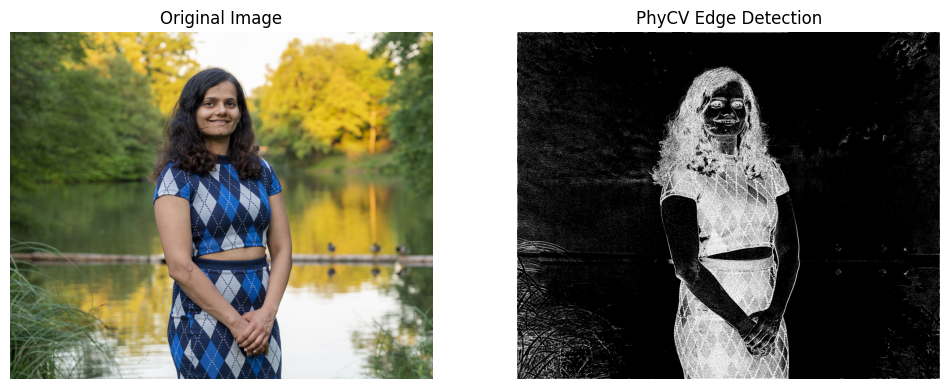

In [10]:
"""
run PST on a single image: 
All steps (load_img -> init_kernel -> apply_kernel) are performed in a single run method. 

"""
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from phycv import PST, PST_GPU


# indicate image file, height and width of the image, and GPU device (if applicable)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_file = "/home/sneha/Downloads/git/image/_DSC6573.jpg"

original_image = mpimg.imread(img_file)

output_path = "./output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# PST parameters
S = 0.3
W = 15
sigma_LPF = 0.15
thresh_min = 0.05
thresh_max = 0.9
morph_flag = 1

# run PST CPU version
pst_cpu = PST()
pst_output_cpu = pst_cpu.run(
    img_file,
    S,
    W,
    sigma_LPF,
    thresh_min,
    thresh_max,
    morph_flag,
)

# run PST GPU version
pst_gpu = PST_GPU(device=device)
pst_output_gpu = pst_gpu.run(
    img_file,
    S,
    W,
    sigma_LPF,
    thresh_min,
    thresh_max,
    morph_flag,
)
pst_output_gpu = pst_output_gpu.cpu().numpy()

# visualize the results
f, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(pst_output_cpu, cmap="gray")
axes[1].axis("off")
axes[1].set_title("PhyCV Edge Detection")
plt.savefig(os.path.join(output_path, "PST_CPU_compare.jpg"), bbox_inches="tight")
pst_cpu_result = Image.fromarray((pst_output_cpu * 255).astype(np.uint8))
pst_cpu_result.save(os.path.join(output_path, "PST_CPU_output.jpg"))

f, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(pst_output_gpu, cmap="gray")
axes[1].axis("off")
axes[1].set_title("PhyCV Edge Detection")
plt.savefig(os.path.join(output_path, "PST_GPU_compare.jpg"), bbox_inches="tight")
pst_gpu_result = Image.fromarray((pst_output_gpu * 255).astype(np.uint8))
pst_gpu_result.save(os.path.join(output_path, "PST_GPU_output.jpg"))



In [1]:
import cv2